## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

###### Install Library

In [ ]:
pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats

###### Read Dataset

In [ ]:
diabetes = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt",sep='\t')
diabetes

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

###### Mean

In [ ]:
mean_values=np.mean(diabetes)
mean_values

AGE     48.518100
SEX      1.468326
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64

###### Variance

In [ ]:
variance_values=np.var(diabetes)
variance_values

AGE     171.457817
SEX       0.248997
BMI      19.475636
BP      190.871586
S1     1195.007473
S2      922.862835
S3      166.915093
S4        1.661493
S5        0.272274
S6      131.866695
Y      5929.884897
dtype: float64

### Task 2: Plot boxplots for BMI, BP and Y depending on gender

###### BMI

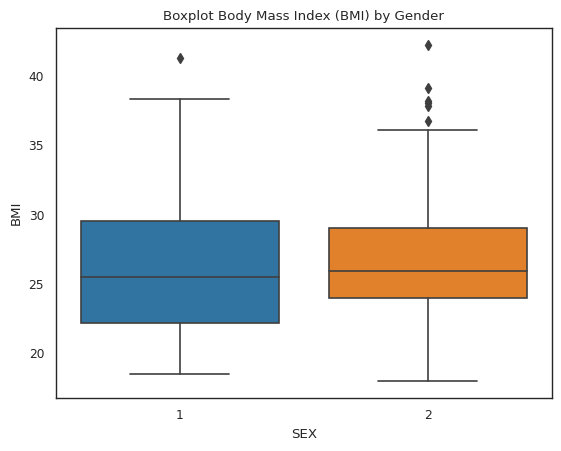

In [ ]:
sns.boxplot(x='SEX', y='BMI', data=diabetes)
plt.title('Boxplot Body Mass Index (BMI) by Gender')
plt.show()

###### SUMMARY OF BMI BLOXPLOT


---
*   Rata-rata berat badan yang terjangkit diabetes dari kedua gender tersebut tidak terpaut jauh, berada disekitar 25.
*   Pada gender 1, batas bawah BMI yang terjangkit diabetes lebih pendek dibandingkan dengan batas atasnya. Sedangkan pada gender 2 yang terjangkit diabetes, antara batas atas dan batas bawah mempunyai panjang yang seimbang.
*   Pada gender 2 walaupun BMI-nya sekitar 37-an ia sudah termasuk ke dalam outlier yang terjangkit diabetes sedangkan pada gender 2 outlier yang terjangkit diabetes sekitar 41.
*   BMI maksimum yang terjangkit diabetes pada gender 1 lebih tinggi yaitu di sekitar 39 sedangkan gender 2 yaitu 36.






###### Average Blood Pressure (BP)

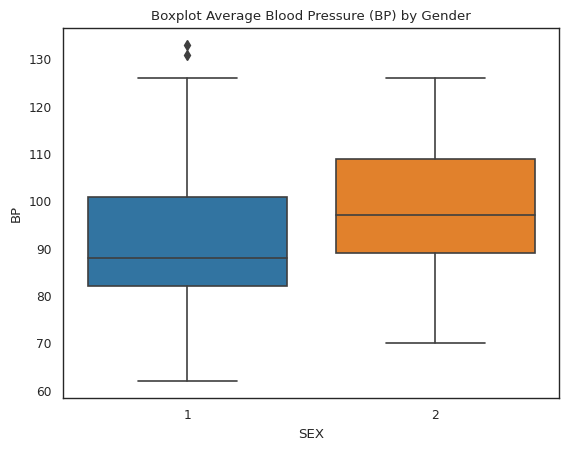

In [ ]:
sns.boxplot(x='SEX', y='BP', data=diabetes)
plt.title('Boxplot Average Blood Pressure (BP) by Gender')
plt.show()

###### SUMMARY OF BP BOXPLOT

---
*   Rata-rata tekanan darah dari kedua gender tersebut hampir terpaut jauh. Rata-rata yang terjangkit diabetes pada gender 1 lebih rendah yaitu dibawah 90 sedangkan rata rata yang terjangkit gender 2 lebih tinggi diatas 90.
*   Dengan tekanan darah rata-rata mencapai 130-an pada gender 1, ternyata masih terdapat yang terjangkit penyakit diabetes.
*   Minumum rata-rata tekanan darah yang terjangkit diabetes pada gender 1 lebih rendah yaitu di sekitar 61 sedangkan gender 2 di sekitar 71.



###### The Qualitative Measure of Disease Progression Over One Year (Y)

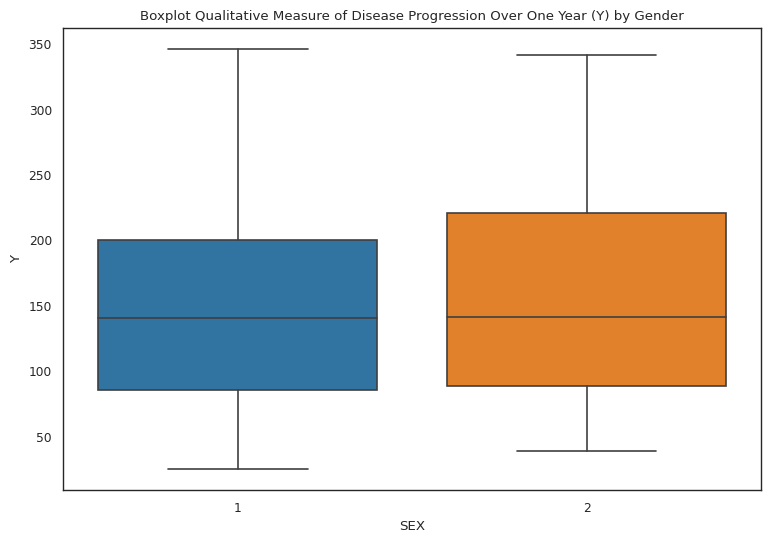

In [ ]:
plt.figure(figsize = (9,6))
sns.boxplot(x='SEX', y='Y', data=diabetes)
plt.title('Boxplot Qualitative Measure of Disease Progression Over One Year (Y) by Gender')
plt.show()

###### SUMMARY OF THE QUALITATIVE MEASURE OF DISEASE PROGRESSION OVER ONE YEAR (Y)


---
*   Berdasarkan tindakan kualitatif yang terjangkit diabetes pada kedua gender mempunyai rata-rata yang sama, yaitu di bawah 150.
*   Batas bawah yang terjangkit diabetes pada gender 1 memiliki nilai di sekitar 44-95 sedangkan gender 2 disekitar 47-98. Batas atas yang terjangkit diabetes pada gender 1 memiliki nilai di sekitar 200-349 sedangkan gender 2 di sekitar 202-347.
*   Berdasarkan tindakan kualitatif, tidak ada seorang pun yang terjangit diabetes di atas nilai minumin maupun di bawah nilai minumum dengan arti lain tidak ada outlier pada kedua gender.



### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

###### Read Dataset

In [ ]:
diabetes

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


###### Info Dataset

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


###### AGE

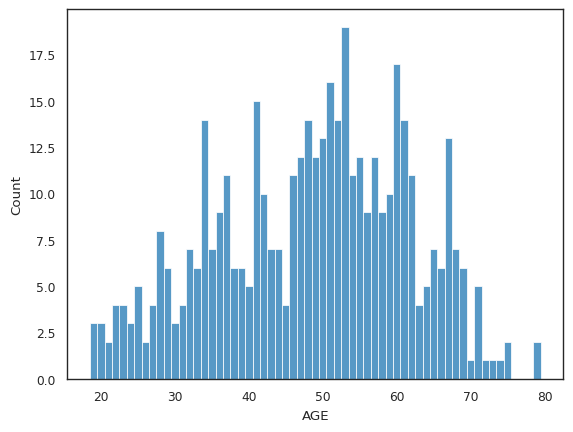

In [ ]:
sns.set_style('white')
sns.set_context("paper")
sns.histplot(data=diabetes, x="AGE", bins = 100, discrete=True)
plt.show()

In [ ]:
age = diabetes["AGE"].values

Fitting 10 distributions: 100%|██████████| 10/10 [00:04<00:00,  2.14it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.031237,877.309530,-4212.220242,inf,0.061591,0.067032
lognorm,0.031422,879.834327,-4203.518959,inf,0.068442,0.030329
gamma,0.031435,877.634091,-4203.328596,inf,0.067551,0.033783
chi2,0.031600,876.419088,-4201.017679,inf,0.072801,0.017530
cauchy,0.033417,928.483282,-4182.395539,inf,0.107522,0.000066


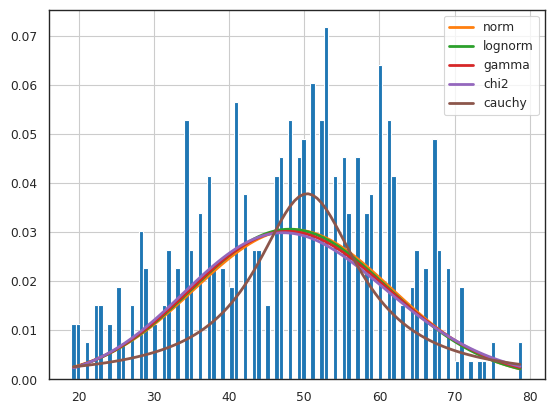

In [ ]:
f = Fitter(age,
          distributions= get_common_distributions())
f.fit()
f.summary()

In [ ]:
f.get_best(method = 'sumsquare_error')

{'norm': {'loc': 48.51809954751131, 'scale': 13.094190207980025}}

In [ ]:
f.fitted_param["norm"]

(48.51809954751131, 13.094190207980025)

###### DISTRIBUTION OF AGE

---

> Pada kasus ini, digunakan distribusi yang paling banyak digunakan yaitu 10 Distribusi yang didapatkan dengan syntax "get_common_distributions()". Oleh karena itu, kita hanya akan memilih 10 distribusi tersebut yang paling cocok digunakan pada dataset age. 

> 10 Distribusi yang paling sering digunakan : Cauchy, Chi-Square, Exponential, Exponential Power, Gamma, Log-Normal, Normal, PowerLaw, Rayleigh, Uniform.


> Output tabel yang ditunjukkan diatas merupakan 5 teratas distribusi terbaik yang dapat digunakan pada dataset.


> Error pada dataset gender mempunyai nilai error yang kecil yaitu 0.031237 sehingga dapat diasumsikan baik. Karena, semakin kecil nilai sumsquare_error, semakin baik kualitas model tersebut dalam memprediksi nilai yang sesuai dengan data asli.


Hasil yang didapatkan dalam memilih distribusi yang cocok untuk Age adalah  **DISTRIBUSI NORM**.

###### SEX/GENDER

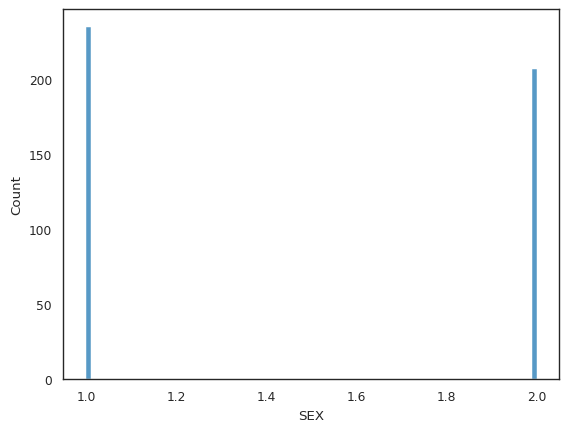

In [ ]:
sns.set_style('white')
sns.set_context("paper")
sns.histplot(data=diabetes, x="SEX", bins = 100)
plt.show()

In [ ]:
sex = diabetes["SEX"].values

Fitting 10 distributions: 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,4068.977413,361.868310,999.441934,inf,0.531674,3.662336e-117
exponpow,4086.876080,383.609560,1001.381946,inf,0.512826,2.044344e-108
powerlaw,4262.961703,411.307396,1020.026951,inf,0.468326,2.120296e-89
chi2,4529.905335,138.246643,1046.872656,inf,0.531674,3.662314e-117
expon,4876.790102,65.808352,1073.394844,inf,0.531674,3.662300e-117


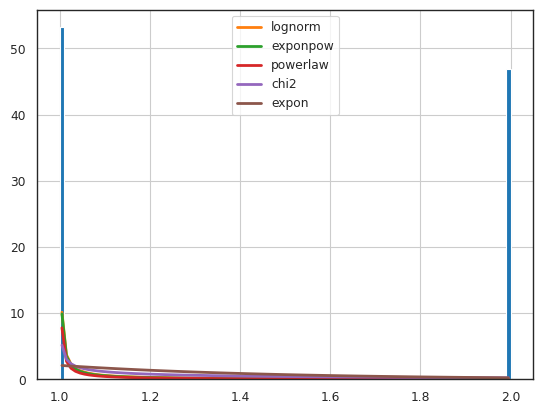

In [ ]:
f = Fitter(sex,
           distributions = get_common_distributions())
f.fit()
f.summary()

In [ ]:
f.get_best(method='sumsquare_error')

{'lognorm': {'s': 6.326343939293897,
  'loc': 0.9999999999999999,
  'scale': 0.32254224289125555}}

In [ ]:
f.fitted_param["lognorm"]

(6.326343939293897, 0.9999999999999999, 0.32254224289125555)

In [68]:
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

###### DISTRIBUTION OF GENDER/SEX

---
> Pada kasus ini, digunakan distribusi yang paling banyak digunakan yaitu 10 Distribusi yang didapatkan dengan syntax "get_common_distributions()". Oleh karena itu, kita hanya akan memilih 10 distribusi tersebut yang paling cocok digunakan pada dataset gender. 


> 10 Distribusi yang paling sering digunakan : Cauchy, Chi-Square, Exponential, Exponential Power, Gamma, Log-Normal, Normal, PowerLaw, Rayleigh, Uniform.



> Output tabel yang ditunjukkan diatas merupakan 5 teratas distribusi terbaik yang dapat digunakan pada dataset.

> Error pada dataset gender mempunyai nilai error yang sangat besar yaitu 4068.977413 sehingga dapat diasumsikan tidak baik. Karena, semakin kecil nilai sumsquare_error, semakin baik kualitas model tersebut dalam memprediksi nilai yang sesuai dengan data asli.

Hasil yang didapatkan dalam memilih distribusi yang cocok untuk Gender adalah  **DISTRIBUSI LOGNORMAL**.



###### BMI

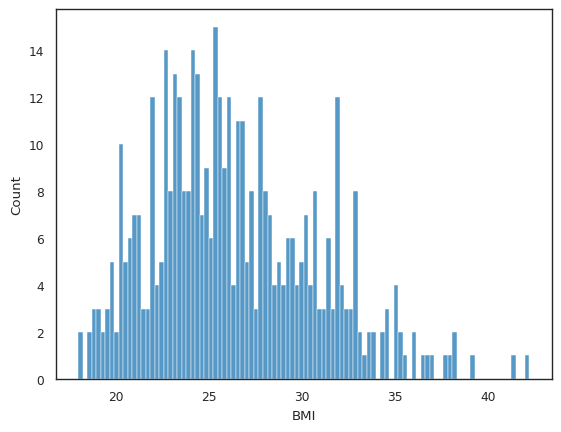

In [ ]:
sns.set_style('white')
sns.set_context("paper")
sns.histplot(data=diabetes, x="BMI", bins = 100)
plt.show()

In [ ]:
bmi = diabetes["BMI"].values

Fitting 110 distributions: 100%|██████████| 110/110 [02:59<00:00,  1.64s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
johnsonsb,0.046578,762.702184,-4023.439001,inf,0.024042,0.954954
ncx2,0.046659,757.119960,-4022.674857,inf,0.029229,0.833588
skewnorm,0.046696,758.060722,-4028.416318,inf,0.028315,0.860318
beta,0.046721,763.239835,-4022.084789,inf,0.026293,0.911951
pearson3,0.046769,756.221608,-4027.729331,inf,0.031103,0.773788


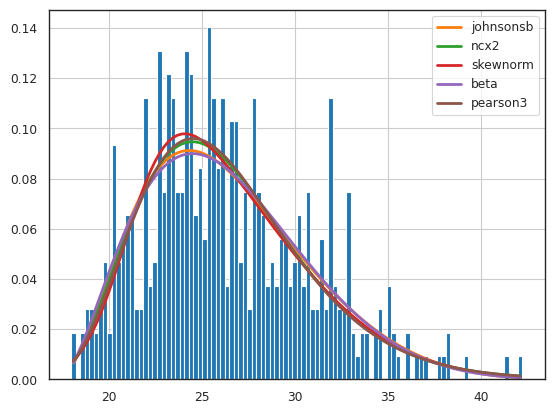

In [ ]:
f = Fitter(bmi)
f.fit()
f.summary()

In [ ]:
f.get_best(method = 'sumsquare_error')

{'johnsonsb': {'a': 1.386501096337284,
  'b': 1.515096403693299,
  'loc': 16.07646912367744,
  'scale': 34.05058841222548}}

In [ ]:
f.fitted_param['johnsonsb']

(1.386501096337284, 1.515096403693299, 16.07646912367744, 34.05058841222548)

###### DISTRIBUTION OF BMI

---
> Pada kasus ini, distribusi yang digunakan sebanyak 110 Distribusi atau dengan arti lain memilih semua distribusi yang terdapat di library tersebut. 

> Output tabel yang ditunjukkan diatas merupakan 5 teratas distribusi terbaik yang dapat digunakan pada dataset.

> Error pada dataset gender mempunyai nilai error yang kecil yaitu 0.046578 sehingga dapat diasumsikan baik. Karena, semakin kecil nilai sumsquare_error, semakin baik kualitas model tersebut dalam memprediksi nilai yang sesuai dengan data asli.

Hasil yang didapatkan dalam memilih distribusi yang cocok untuk BMI adalah  **DISTRIBUSI JOHNSON SB**.

###### QUALITATIVE MEASURE OF DIASEASE PROGRESSION OVER ONE YEAR (Y)

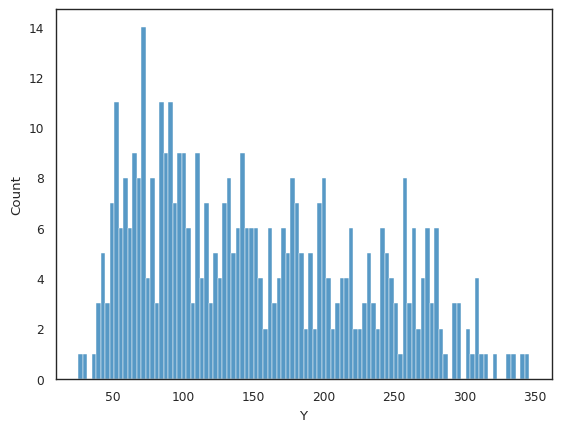

In [ ]:
sns.set_style('white')
sns.set_context("paper")
sns.histplot(data=diabetes, x="Y", bins = 100)
plt.show()

In [ ]:
y = diabetes['Y'].values

Fitting 110 distributions: 100%|██████████| 110/110 [04:03<00:00,  2.22s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
triang,0.000206,1202.098511,-6425.866261,inf,0.041311,0.426223
johnsonsb,0.000214,1199.704260,-6402.022863,inf,0.040976,0.436485
skewnorm,0.000217,1217.265809,-6401.772009,inf,0.056110,0.119050
beta,0.000242,1198.532817,-6348.661105,inf,0.056467,0.114865
nakagami,0.000244,inf,-6349.892216,inf,0.049281,0.225789


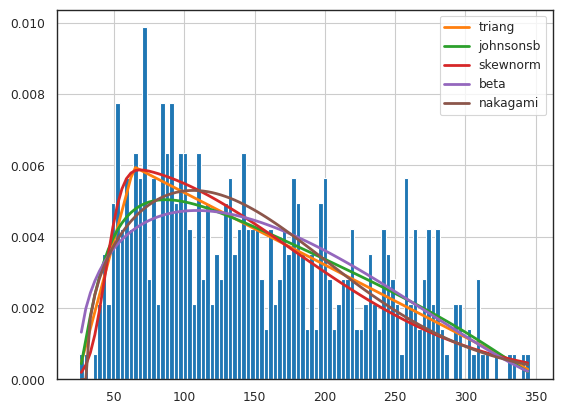

In [ ]:
f = Fitter(y)
f.fit()
f.summary()

In [ ]:
f.get_best(method = 'sumsquare_error')

{'triang': {'c': 0.12134314084107695,
  'loc': 23.311237599328184,
  'scale': 335.31983859453794}}

In [ ]:
f.fitted_param['triang']

(0.12134314084107695, 23.311237599328184, 335.31983859453794)

###### DISTRIBUTION OF QUALITATIVE MEASURE OF DIASEASE PROGRESSION OVER ONE YEAR (Y)

---
> Pada kasus ini, distribusi yang digunakan sebanyak 110 Distribusi atau dengan arti lain memilih semua distribusi yang terdapat di library tersebut. 

> Output tabel yang ditunjukkan diatas merupakan 5 teratas distribusi terbaik yang dapat digunakan pada dataset.


> Error pada dataset gender mempunyai nilai error yang kecil yaitu 0.000206 sehingga dapat diasumsikan baik. Karena, semakin kecil nilai sumsquare_error, semakin baik kualitas model tersebut dalam memprediksi nilai yang sesuai dengan data asli.



Hasil yang didapatkan dalam memilih distribusi yang cocok untuk THE QUALITATIVE MEASURE OF DIASEASE PROGRESSION OVER ONE YEAR (Y) adalah  **DISTRIBUSI TRIANG**.

#### REFERENCE

[Library Fitter about Distributions](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)